In [1]:
## After fixing averaging bug in 
## /short_scripts/Tutorial/scAnalysis_Workflow/Experimenting/fix_bugs_stacked_frequency.ipynb
## To see Details on the Parameters, just press Shift + Tab in the function plot_rel_frequencies_per_sample()
import numpy as np
import matplotlib.pyplot as plt
import scanpy as sc
import pandas as pd
import seaborn as sb

# Some custom functions
import ma_codes as codes
from ma_codes import mysize, mymap

folder = "/media/agando/206c956b-9fe0-492c-b181-e920c87f2401/Projects/200217_SmokedMice_all/"
sc.logging.print_version_and_date()

Running Scanpy 1.4.5.2.dev23+g7e058a1a, on 2020-03-13 08:34.


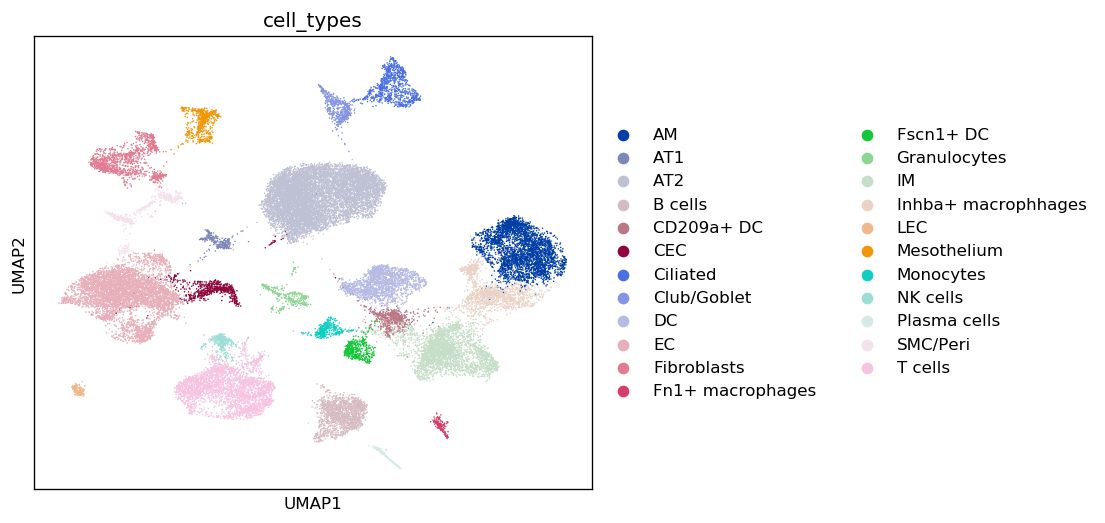

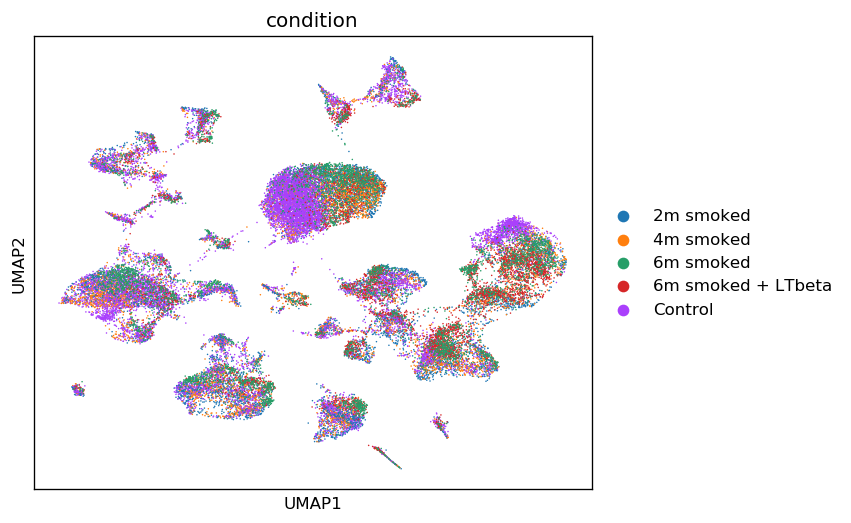

In [3]:
adata = sc.read(folder + "200310_Smoked_Mice_all.h5ad", ache = False)
sc.pl.umap(adata, color = "cell_types", ax = mysize(6, 5, 120))
sc.pl.umap(adata, color = "condition", ax = mysize(6, 5, 120))

### Relative Frequencies of cell types per identifier

In [11]:
xlabel = "name"
cell_types_label = "cell_types"
cols = adata.uns["%s_colors" %cell_types_label]
celltypes = adata.obs[cell_types_label].cat.categories
order = adata.obs[xlabel].cat.categories.values

relFreqs = codes.calc_relFreq(adata, group_by = cell_types_label, xlabel = xlabel, condition = None)
relFreqs.head(2)

,AM,AT1,AT2,B cells,CD209a+ DC,CEC,Ciliated,Club/Goblet,DC,EC,...,IM,Inhba+ macrophhages,LEC,Mesothelium,Monocytes,NK cells,Plasma cells,SMC/Peri,T cells,name
muc13913,0.022587,0.004791,0.260096,0.065708,0.024641,0.015743,0.015058,0.008214,0.060233,0.079398,...,0.116359,0.060233,0.004107,0.008898,0.007529,0.013689,0.008898,0.008898,0.167009,SMK-2m-2
muc13914,0.058782,0.002125,0.290368,0.041076,0.016289,0.019122,0.026204,0.004958,0.044618,0.113314,...,0.089943,0.033994,0.016997,0.024788,0.006374,0.009207,0.006374,0.009915,0.099150,SMK-2m-3


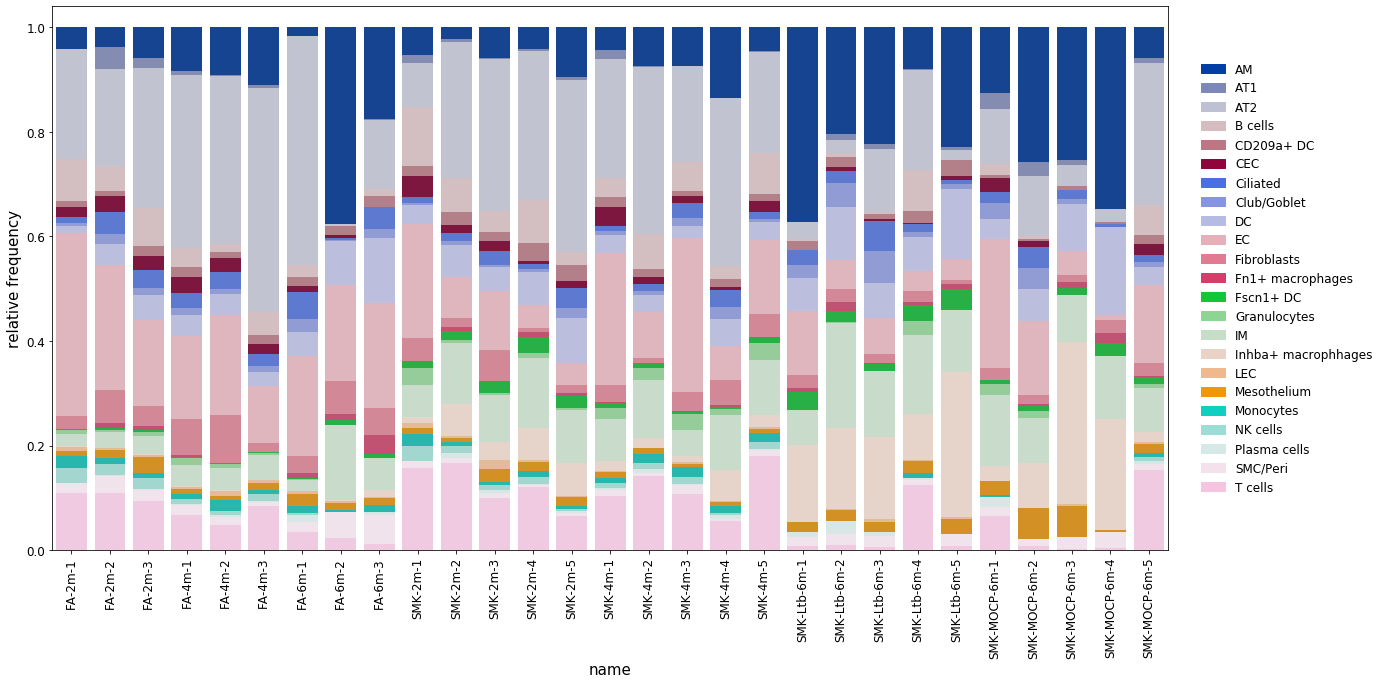

In [12]:
codes.plot_cluster_composition(relFreqs, xlabel = xlabel, figsize = (6, 10), order = None,
                               errbar = False, cols = cols, width = 0.8)

### Relative Frequencies of cell types per group

In [13]:
xlabel = "condition"
cell_types_label = "cell_types"
cols = adata.uns["%s_colors" %cell_types_label]
celltypes = adata.obs[cell_types_label].cat.categories

relFreqs = codes.calc_relFreq(adata, group_by = cell_types_label, xlabel = xlabel, condition = None)
relFreqs.head(2)

,AM,AT1,AT2,B cells,CD209a+ DC,CEC,Ciliated,Club/Goblet,DC,EC,...,IM,Inhba+ macrophhages,LEC,Mesothelium,Monocytes,NK cells,Plasma cells,SMC/Peri,T cells,condition
muc13913,0.022587,0.004791,0.260096,0.065708,0.024641,0.015743,0.015058,0.008214,0.060233,0.079398,...,0.116359,0.060233,0.004107,0.008898,0.007529,0.013689,0.008898,0.008898,0.167009,2m smoked
muc13914,0.058782,0.002125,0.290368,0.041076,0.016289,0.019122,0.026204,0.004958,0.044618,0.113314,...,0.089943,0.033994,0.016997,0.024788,0.006374,0.009207,0.006374,0.009915,0.099150,2m smoked


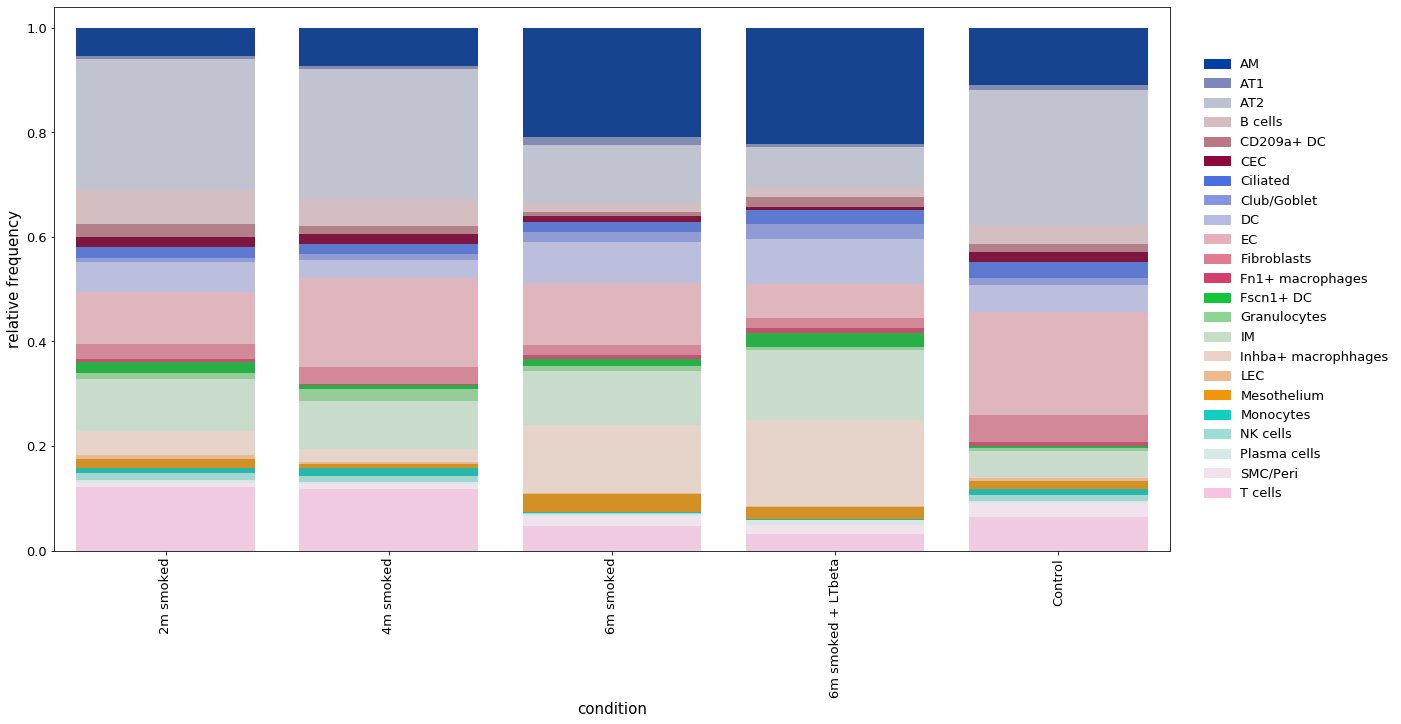

In [61]:
codes.plot_cluster_composition(relFreqs, xlabel = xlabel, figsize = (6, 10), order = None,
                               errbar = False, cols = cols, width = 0.8)

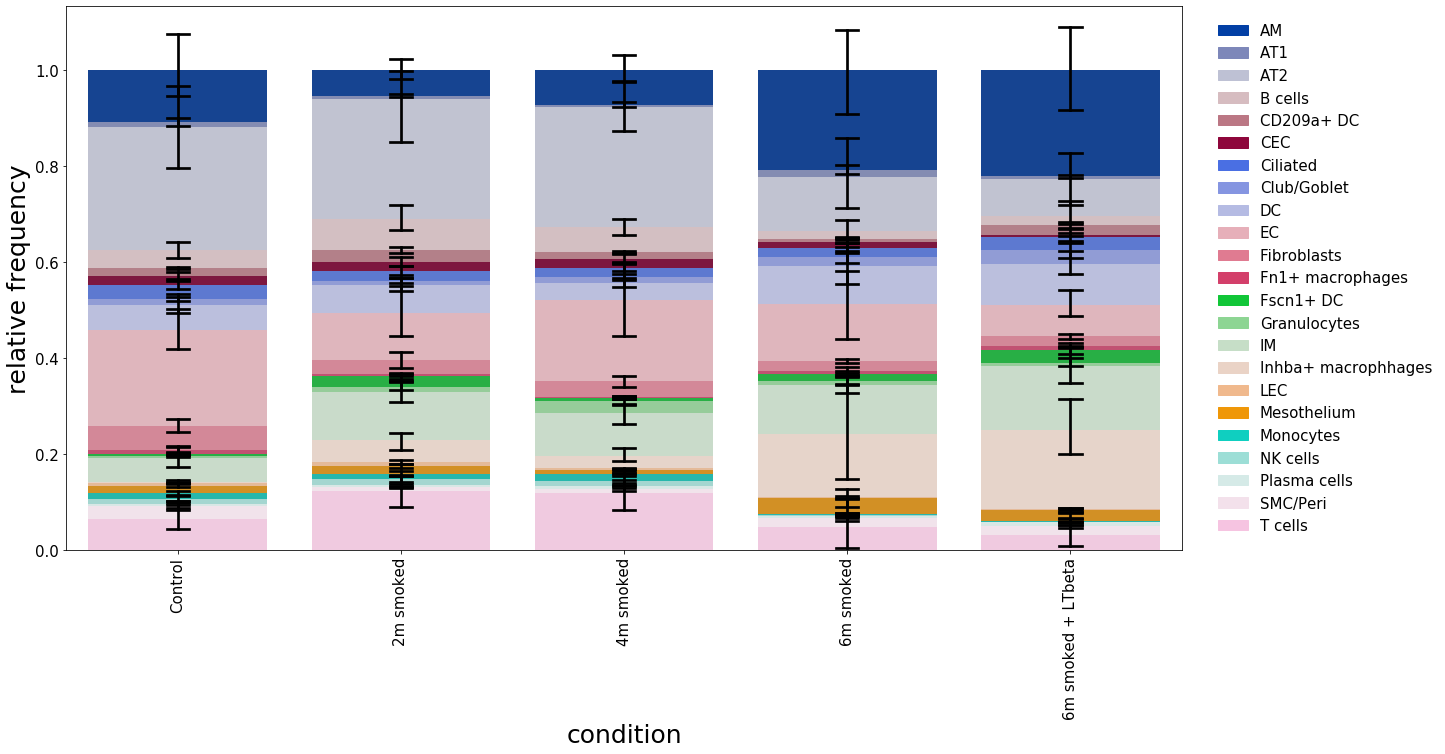

In [59]:
## Change ordering, size of legends and add Error Bars
order = ["Control",'2m smoked', '4m smoked', '6m smoked', '6m smoked + LTbeta']
codes.plot_cluster_composition(relFreqs, xlabel = xlabel, figsize = (6, 10), order = order,
                               labelsize = 25, ticksize = 15, capsize = 0.1,
                               errbar = True, cols = cols, width = 0.8)

### Contribution of Samples to each cluster

In [82]:
## Get Relative Frequencies per identifier
xlabel = "name"
cell_type_label = "cell_types"
cols = adata.uns["%s_colors" %xlabel]

relFreqs = codes.calc_relFreq_per_cluster(adata, group_by = cell_type_label, xlabel = xlabel)
relFreqs.head(2)

,FA-2m-1,FA-2m-2,FA-2m-3,FA-4m-1,FA-4m-2,FA-4m-3,FA-6m-1,FA-6m-2,FA-6m-3,SMK-2m-1,...,SMK-Ltb-6m-2,SMK-Ltb-6m-3,SMK-Ltb-6m-4,SMK-Ltb-6m-5,SMK-MOCP-6m-1,SMK-MOCP-6m-2,SMK-MOCP-6m-3,SMK-MOCP-6m-4,SMK-MOCP-6m-5,cell_types
AM,0.013465,0.016158,0.027528,0.040993,0.041293,0.049970,0.012268,0.096349,0.026332,0.024835,...,0.047876,0.081987,0.044883,0.025135,0.026930,0.041592,0.030820,0.021544,0.054159,AM
AT1,0.000000,0.212014,0.106007,0.053004,0.003534,0.028269,0.000000,0.000000,0.003534,0.081272,...,0.031802,0.038869,0.014134,0.007067,0.074205,0.049470,0.014134,0.000000,0.098940,AT1


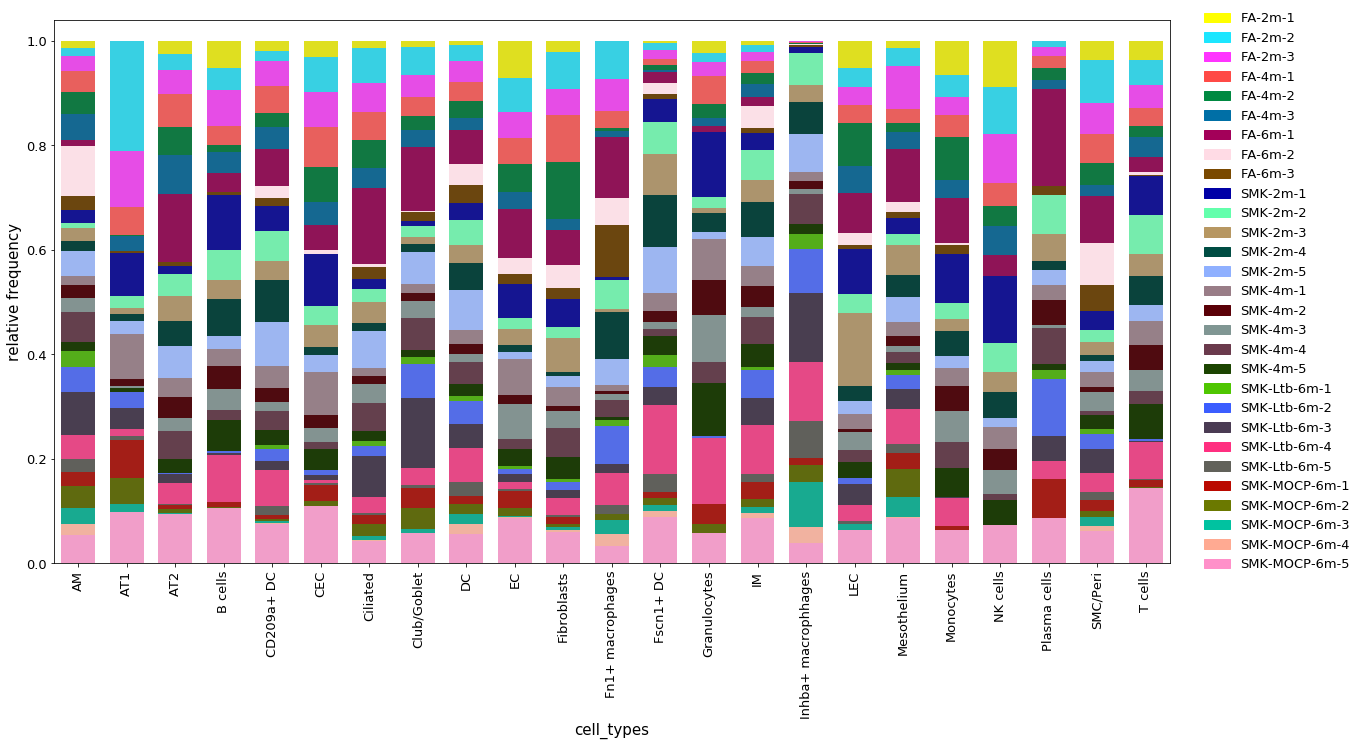

In [85]:
codes.plot_cluster_composition(relFreqs, xlabel = cell_type_label, figsize = (16, 8), cols = cols, 
                               margins = (0.02, 0.04), width = 0.7, order = None, save = None)

### Cluster Composition by Treatment

In [86]:
## Get Relative Frequencies per identifier
xlabel = "condition"
cell_type_label = "cell_types"
cols = adata.uns["%s_colors" %xlabel]

relFreqs = codes.calc_relFreq_per_cluster(adata, group_by = cell_type_label, xlabel = xlabel)
relFreqs.head(2)

,2m smoked,4m smoked,6m smoked,6m smoked + LTbeta,Control,cell_types
AM,0.125374,0.143627,0.175045,0.231598,0.324357,AM
AT1,0.155477,0.109541,0.236749,0.091873,0.406360,AT1


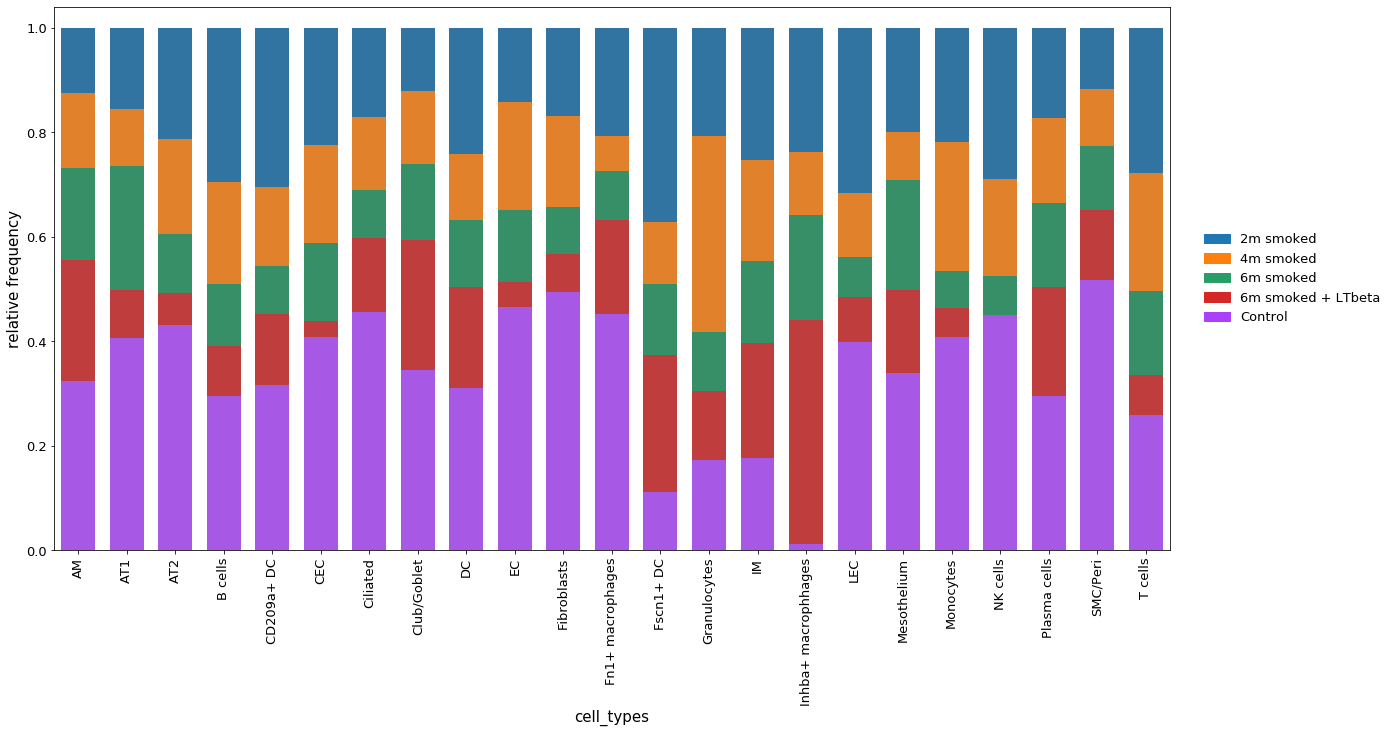

In [87]:
codes.plot_cluster_composition(relFreqs, xlabel = cell_type_label, figsize = (16, 8), cols = cols, 
                               margins = (0.02, 0.04), width = 0.7, order = None, save = None)

### Save the Plot

Saving Figure to /home/agando/Desktop/test.pdf


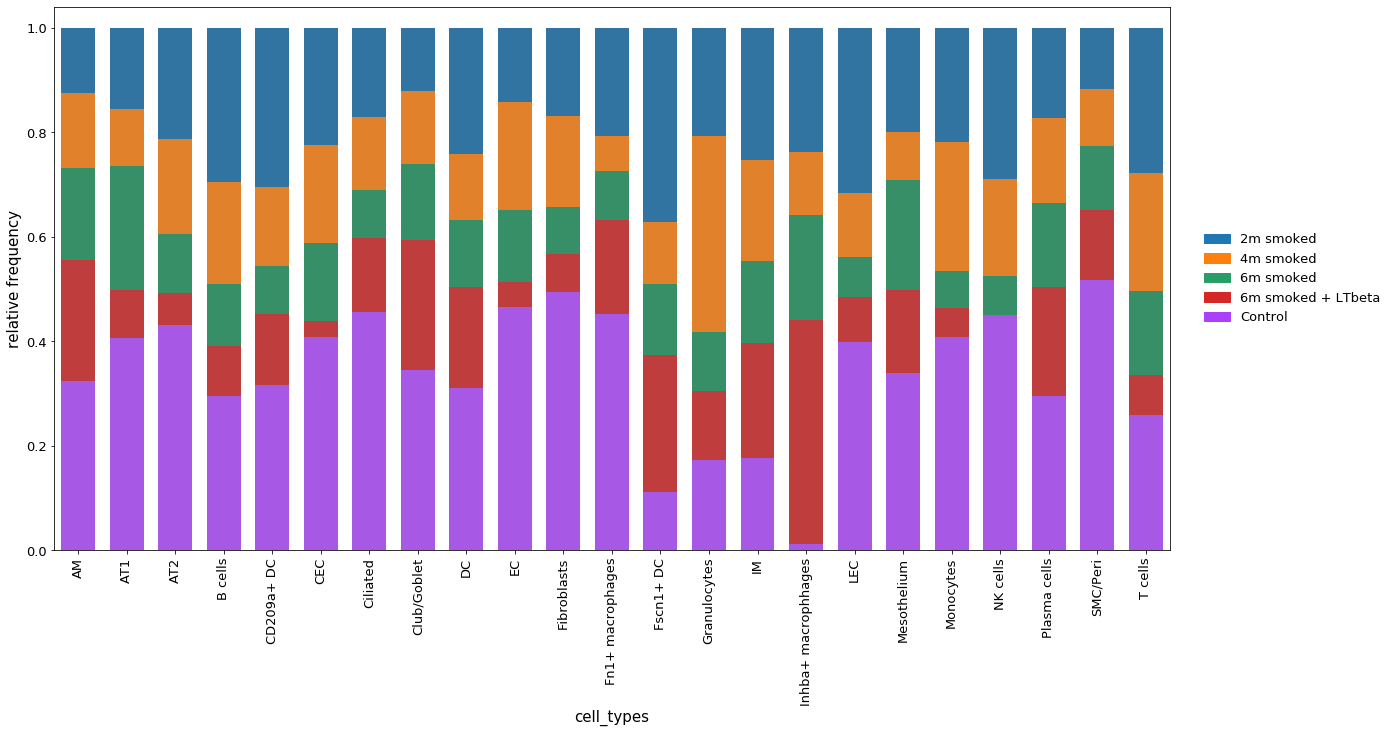

In [88]:
plot_folder = "/home/agando/Desktop/"
codes.plot_cluster_composition(relFreqs, xlabel = cell_type_label, figsize = (16, 8), cols = cols, 
                               margins = (0.02, 0.04), width = 0.7, order = None, save = plot_folder + "test.pdf")